## Lab 1

In [98]:
# ALPHABET = ('a', 'ą', 'b', 'c', 'ć', 'd', 'e', 'ę', 'f', 'g',
#             'h', 'i', 'j', 'k', 'l', 'ł', 'm', 'n', 'ń', 'o',
#             'ó', 'p', 'r', 's', 'ś', 't', 'u', 'w', 'y', 'z',
#             'ź', 'ż')
alphabet = [chr(i) for i in range(1114112)]
ALPHABET = alphabet

In [175]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### zad 1.1 Implementacja algorytmu naiwego znajdującego pattern w tekście

In [237]:
def naive_string_maching(text, pattern):
    n = len(text)
    m = len(pattern)
    tab = []
    match_result = 0
    for s in range(n - m + 1):
        # if s % 10000 == 0:
        #     print(s//10000)
        if pattern == text[s : s + m]:
            # print(f'Znaleziono na pozycji {s}')
            tab.append(s)
            match_result += 1
    
    return match_result, tab

In [49]:
sum_of_match_naive_1, result_naive_1 = naive_string_maching("aaaaabbbaaaabaaab", "ab")
print(sum_of_match_naive_1, result_naive_1)

3 [4, 11, 15]


### Zad 1.2.1 Implemetacja automatu skończonego

In [143]:
def fa_string_maching(text, delta : list[dict]):
    q = 0
    length = len(delta) - 1
    tab = []
    match_result = 0
    for i in range(0, len(text)):
        
        if text[i] in delta[q]:
            q = delta[q][text[i]]
        else:
            q = 0

        if(q == length):
            # print(f'Przesunięcie {i + 1 - q} jest poprawne')
            tab.append(i+1-q)
            match_result += 1
    
    return match_result, tab


### Zad 1.2.2 Implementacja algorytmu generującego funkcję przejścia


In [142]:
def transition_table(pattern):
    result = []
    alpha = list(set(pattern))
    for q in range(len(pattern) + 1):
        result.append({})
        for a in alpha: #Przechodzenie po alfabecie
            k = min(len(pattern) + 1, q + 2)
            while True:
                k = k - 1
                # q[:k] - prefix
                # q[-k:] - sufix
                if (k == 0 or pattern[:k] == (pattern[:q] + a)[-k:]):
                    break
            result[q][a] = k
    
    return result

### Zad 1.3 Algorytm Knutha-Morrisa-Pratta (KMP)

In [223]:
def prefix_function(pattern):
    pi = [0]
    k = 0

    for q in range(1, len(pattern)):
    
        while (k > 0 and pattern[k] != pattern[q]):
            k = pi[k-1]
        if(pattern[k] == pattern[q]):
            k = k + 1
        pi.append(k)
    return pi

In [81]:
def kmp_string_matching(text, pattern, pi):
    q = 0
    tab = []
    match_result = 0
    for i in range(0, len(text)):
        while(q > 0 and pattern[q] != text[i]):
            q = pi[q-1]
        if(pattern[q] == text[i]):
            q = q + 1
        if(q == len(pattern)):
            # print(f"Przesunięcie {i + 1 - q} jest poprawne")
            tab.append(i+1-q)
            match_result += 1
            q = pi[q-1]
    
    return match_result, tab

### Zad 2 - testy porównujące szybkość

In [219]:
def patternFindingTimeTest(text, pattern, flag = True):
    preprocessing_time = 0
    main_algorithm_time = 0
    
    pre_naive = 0
    main_naive = 0

    pre_fa = 0
    main_fa = 0

    pre_kmp = 0
    main_kmp = 0


    # naive algorithm
    for i in range(len(pattern)):
        main_algorithm_time = time.perf_counter()
        a, b = naive_string_maching(text, pattern[i])
        main_naive += time.perf_counter() - main_algorithm_time

    if flag:
        print("Naive algorithm: \n Pre-processing: {}    Find-pattern: {}   Whole time: {}".format(
            pre_naive, main_naive, main_naive + pre_naive))

    # Finite automata
    # pre-pocessing time
    for i in range(len(pattern)):

        preprocessing_time = time.perf_counter()
        table = transition_table(pattern[i])
        pre_fa += time.perf_counter() - preprocessing_time

        # main algorithm
        main_algorithm_time = time.perf_counter()
        a, b = fa_string_maching(text, table)
        main_fa += time.perf_counter() - main_algorithm_time
    
    if flag:
        print("Finite automata algorithm: \n Pre-processing: {}    Find-pattern: {}   Whole time: {}".format(
            pre_fa, main_fa, main_fa + pre_fa))
    
    # KMP algorithm
    # pre-pocessing time
    for i in range(len(pattern)):

        preprocessing_time = time.perf_counter()
        pi = prefix_function(pattern[i])
        pre_kmp += time.perf_counter() - preprocessing_time

        # main algorithm
        main_algorithm_time = time.perf_counter()
        a, b = kmp_string_matching(text, pattern, pi)
        main_kmp += time.perf_counter() - main_algorithm_time
    
    if flag:
        print("KMP algorithm: \n Pre-processing: {}    Find-pattern: {}   Whole time: {}".format(
            pre_kmp, main_kmp, main_kmp + pre_kmp))
    
    if not flag:
        return (pre_naive, pre_fa, pre_kmp), (main_naive, main_fa, main_kmp)

### Zad 3 - znajdowanie "pan", "pani" w Pan Tadeusz

In [99]:
def findPattern(file, pattern):
    with open(file) as data:
        
        pan_tadeusz = data.read()
        # pattern = ("pan", "pani")

        naive_res = 0
        fa_res = 0
        kmp_res = 0

        # naive alg
        for i in range(len(pattern)):
            tmp_naive, naive_tab = naive_string_maching(pan_tadeusz, pattern[i])
            naive_res += tmp_naive

        # fa alg
        for i in range(len(pattern)):
            delta = transition_table(pattern[i])
            # print('Krowa')
            # print(delta)
            tmp_fa, fa_tab1 = fa_string_maching(pan_tadeusz, delta)
            fa_res += tmp_fa

        # KMP alg
        for i in range(len(pattern)):
            pf = prefix_function(pattern[i])
            tmp_kmp, kmp_tab1 = kmp_string_matching(pan_tadeusz, pattern[i], pf)
            kmp_res += tmp_kmp
        
        print("Number of pattern: 'pan', 'pani' finded in Pan Tadeusz \n naive: {}  fa: {}  kmp: {}".format(
            naive_res, fa_res, kmp_res))

In [144]:
findPattern("pan-tadeusz.txt", ("pan", "pani"))

Number of pattern: 'pan', 'pani' finded in Pan Tadeusz 
 naive: 501  fa: 501  kmp: 501


### Zad 4 - szybkość działania

In [145]:
with open("pan-tadeusz.txt") as data:
    pan_tadeusz = data.read()
    patternFindingTimeTest(pan_tadeusz,("pan", "pani"))

Naive algorithm: 
 Pre-processing: 0    Find-pattern: 0.10285560799820814   Whole time: 0.10285560799820814
Finite automata algorithm: 
 Pre-processing: 5.9155998314963654e-05    Find-pattern: 0.07358845799899427   Whole time: 0.07364761399730924
KMP algorithm: 
 Pre-processing: 2.074200165225193e-05    Find-pattern: 0.09343985400118981   Whole time: 0.09346059600284207


In [208]:
pre_to_plot = {"naive" : [], "fa" : [], "kmp" : []}
main_to_plot = {"naive" : [], "fa" : [], "kmp" : []}
all_time = {"naive" : [], "fa" : [], "kmp" : []}
n = 5
pattern = ('pan', 'pani')

with open("pan-tadeusz.txt") as data:
    pan_tadeusz = data.read()

    for i in range(n):
        a, b = patternFindingTimeTest(pan_tadeusz, pattern, flag=False)

        for j, key in enumerate(pre_to_plot.keys()):
            pre_to_plot[key].append(a[j])
            main_to_plot[key].append(b[j])
            all_time[key].append(a[j] + b[j])

In [147]:
print(pre_to_plot["kmp"])

[1.6133002645801753e-05, 1.3060001947451383e-05, 2.088300243485719e-05, 1.3898003089707345e-05, 1.180400067823939e-05]


Przedstawienie na wykresach czas wykonania pre-processingu dla odpowiednich algorytmów.

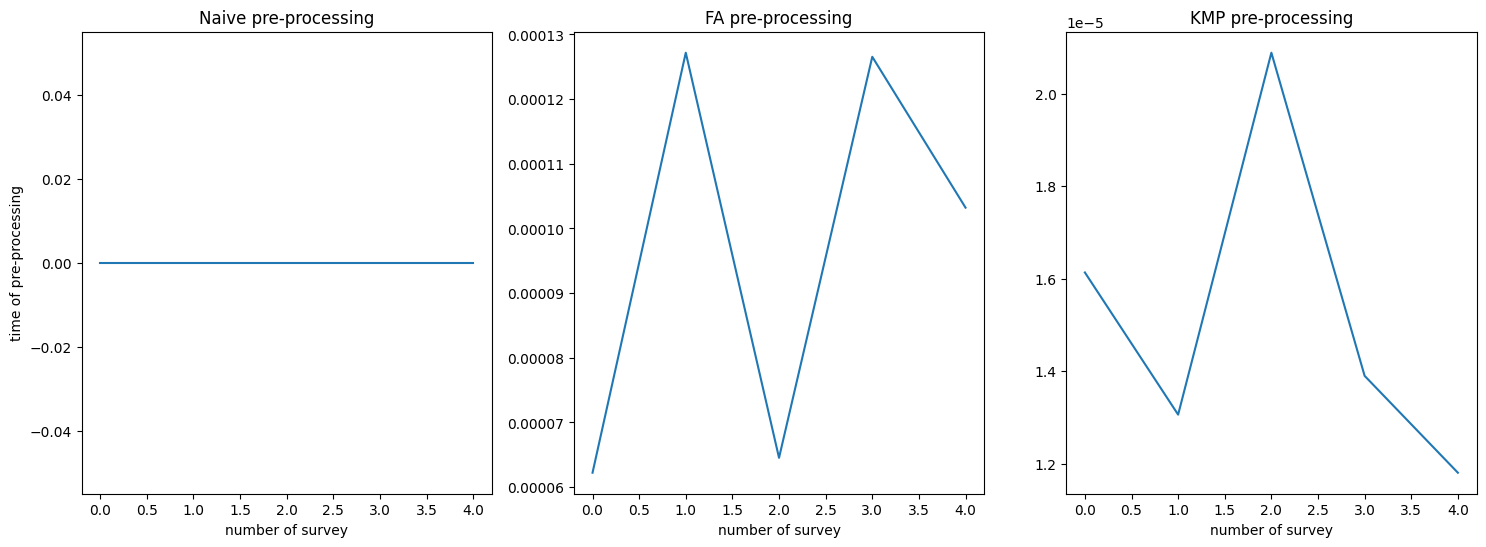

In [150]:
r = np.arange(n)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 6))

ax1.plot(r, pre_to_plot["naive"])
ax2.plot(r, pre_to_plot["fa"])
ax3.plot(r, pre_to_plot["kmp"])

ax1.set_title("Naive pre-processing")
ax1.set_ylabel("time of pre-processing")
ax2.set_title("FA pre-processing")
ax3.set_title("KMP pre-processing")

ax1.set_xlabel("number of survey")
ax2.set_xlabel("number of survey")
ax3.set_xlabel("number of survey")

# ax1.legend(["naive", "fa", "kmp"],loc =4)

plt.show()

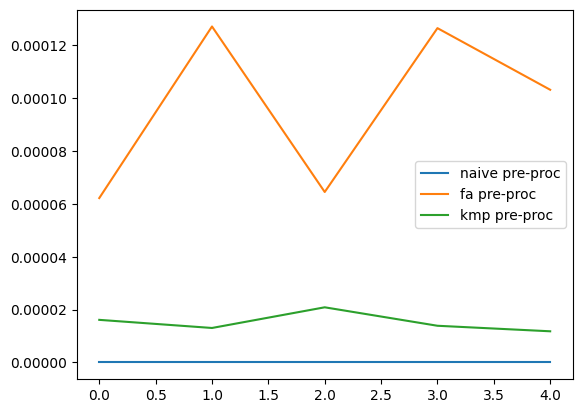

In [159]:
plt.plot(r, pre_to_plot["naive"])
plt.plot(r, pre_to_plot["fa"])
plt.plot(r, pre_to_plot["kmp"])
plt.legend(['naive pre-proc', 'fa pre-proc', 'kmp pre-proc'],loc = 5)
plt.show()

Przedstawienie na wykresach czas wykonania wyszukiwania wzorca dla odpowiednich algorytmów.

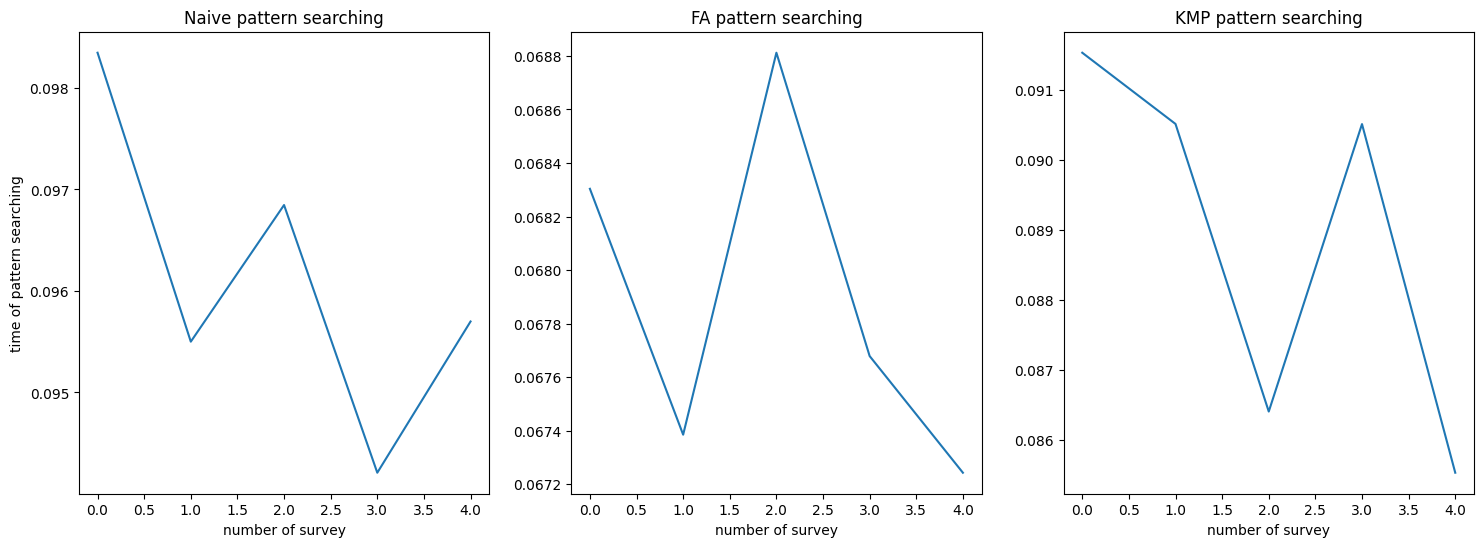

In [151]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 6))

ax1.plot(r, main_to_plot["naive"])
ax2.plot(r, main_to_plot["fa"])
ax3.plot(r, main_to_plot["kmp"])

ax1.set_title("Naive pattern searching")
ax1.set_ylabel("time of pattern searching")
ax2.set_title("FA pattern searching")
ax3.set_title("KMP pattern searching")

ax1.set_xlabel("number of survey")
ax2.set_xlabel("number of survey")
ax3.set_xlabel("number of survey")

# ax1.legend(["naive", "fa", "kmp"],loc =4)

plt.show()

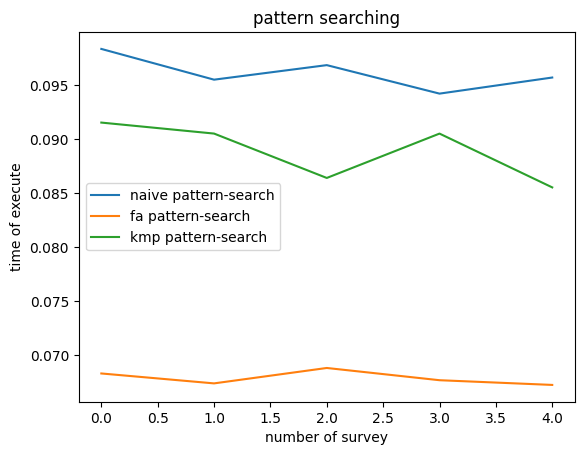

In [174]:
plt.plot(r, main_to_plot["naive"])
plt.plot(r, main_to_plot["fa"])
plt.plot(r, main_to_plot["kmp"])
plt.xlabel('number of survey')
plt.ylabel('time of execute')
plt.title("pattern searching")
plt.legend(['naive pattern-search', 'fa pattern-search', 'kmp pattern-search'],loc = 0)
plt.show()

Przedstawienie danych z czasu pre-processingu w tabeli

In [212]:
data = {'naive_pre_processing': pre_to_plot["naive"] + [max(pre_to_plot["naive"]), min(pre_to_plot["naive"]), np.mean(pre_to_plot["naive"])],
        'fa_pre_processing': pre_to_plot["fa"]+ [max(pre_to_plot["fa"]), min(pre_to_plot["fa"]), np.mean(pre_to_plot["fa"])],
        'kmp_pre_processing': pre_to_plot["kmp"]+ [max(pre_to_plot["kmp"]), min(pre_to_plot["kmp"]), np.mean(pre_to_plot["kmp"])],
        }

data_pre_proc = pd.DataFrame(data, index=[str(i+1) + ' iteration' for i in range(n)] + ['max', 'min', 'mean'])

In [213]:
print(data_pre_proc)

             naive_pre_processing  fa_pre_processing  kmp_pre_processing
1 iteration                   0.0           0.000062            0.000018
2 iteration                   0.0           0.000085            0.000014
3 iteration                   0.0           0.000113            0.000014
4 iteration                   0.0           0.000058            0.000032
5 iteration                   0.0           0.000060            0.000014
max                           0.0           0.000113            0.000032
min                           0.0           0.000058            0.000014
mean                          0.0           0.000076            0.000019


Przedstawienie danych z czasu głównego algorytmu w tabeli

In [203]:
data = {'naive_pattern_search': main_to_plot["naive"] + [max(main_to_plot["naive"]), min(main_to_plot["naive"]), np.mean(main_to_plot["naive"])],
        'fa_pattern_search': main_to_plot["fa"]+ [max(main_to_plot["fa"]), min(main_to_plot["fa"]), np.mean(main_to_plot["fa"])],
        'kmp_pattern_search': main_to_plot["kmp"]+ [max(main_to_plot["kmp"]), min(main_to_plot["kmp"]), np.mean(main_to_plot["kmp"])],
        }
data_main_alg = pd.DataFrame(data, index=[str(i+1) + ' iteration' for i in range(n)] + ['max', 'min', 'mean'])


In [204]:
print(data_main_alg)

             naive_pattern_search  fa_pattern_search  kmp_pattern_search
1 iteration              0.098347           0.068304            0.091528
2 iteration              0.095500           0.067385            0.090511
3 iteration              0.096846           0.068812            0.086402
4 iteration              0.094209           0.067679            0.090509
5 iteration              0.095699           0.067243            0.085528
max                      0.098347           0.068812            0.091528
min                      0.094209           0.067243            0.085528
mean                     0.096120           0.067885            0.088896


Przedstawienie danych z czasu głównego oraz czasu pre-processingu algorytmu w tabeli

In [214]:
data = {'naive_whole_alg': all_time["naive"] + [max(all_time["naive"]), min(all_time["naive"]), np.mean(all_time["naive"])],
        'fa_whole_alg': all_time["fa"]+ [max(all_time["fa"]), min(all_time["fa"]), np.mean(all_time["fa"])],
        'kmp_whole_alg': all_time["kmp"]+ [max(all_time["kmp"]), min(all_time["kmp"]), np.mean(all_time["kmp"])],
        }

data_all_time = pd.DataFrame(data, index=[str(i+1) + ' iteration' for i in range(n)] + ['max', 'min', 'mean'])

In [238]:
print(data_all_time)

             naive_whole_alg  fa_whole_alg  kmp_whole_alg
1 iteration         0.096874      0.073514       0.088854
2 iteration         0.095734      0.069230       0.091128
3 iteration         0.096597      0.068368       0.090864
4 iteration         0.094376      0.068977       0.085712
5 iteration         0.095499      0.069025       0.090885
max                 0.096874      0.073514       0.091128
min                 0.094376      0.068368       0.085712
mean                0.095816      0.069823       0.089489


### Zad 5

In [265]:
ex_text = "aba" * 10000000
ex_pattern =("b" * 100000, )

In [266]:
patternFindingTimeTest(ex_text, ex_pattern)

Naive algorithm: 
 Pre-processing: 0    Find-pattern: 55.71981143300218   Whole time: 55.71981143300218
Finite automata algorithm: 
 Pre-processing: 0.4485174850015028    Find-pattern: 2.08350835300007   Whole time: 2.532025838001573
KMP algorithm: 
 Pre-processing: 0.013876408000214724    Find-pattern: 2.6291484009998385   Whole time: 2.643024809000053
